In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the data
df = pd.read_csv('/content/retail_price.csv')

In [6]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

Text(0, 0.5, 'Frequency')

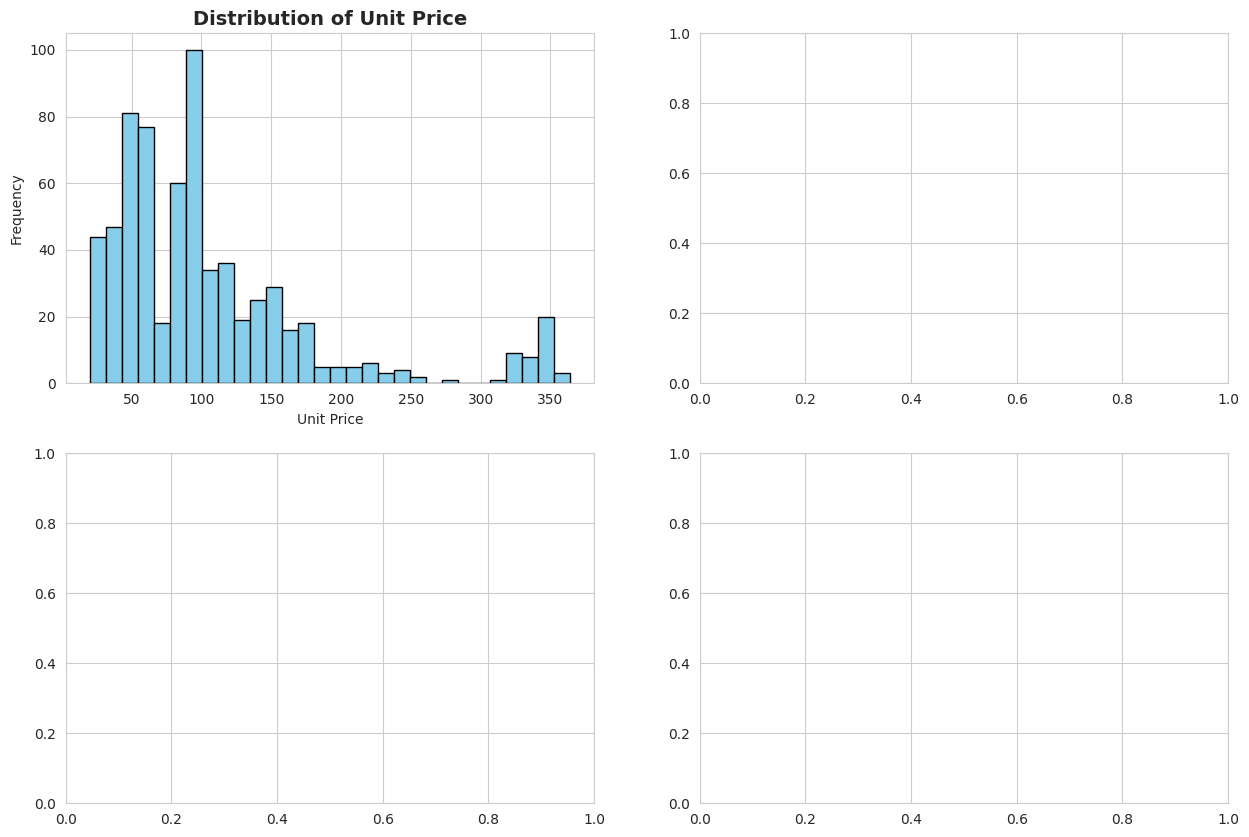

In [7]:
# 1. Distribution of Target Variable (unit_price)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['unit_price'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Unit Price', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Unit Price')
axes[0, 0].set_ylabel('Frequency')


In [8]:
# 2. Quantity vs Unit Price
axes[0, 1].scatter(df['qty'], df['unit_price'], alpha=0.6, color='coral')
axes[0, 1].set_title('Quantity vs Unit Price', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Unit Price')

Text(662.465909090909, 0.5, 'Unit Price')

In [9]:
# 3. Competitor Pricing Analysis
axes[1, 0].scatter(df['comp_1'], df['unit_price'], alpha=0.5, label='Comp 1', color='green')
axes[1, 0].scatter(df['comp_2'], df['unit_price'], alpha=0.5, label='Comp 2', color='red')
axes[1, 0].scatter(df['comp_3'], df['unit_price'], alpha=0.5, label='Comp 3', color='blue')
axes[1, 0].set_title('Competitor Prices vs Unit Price', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Competitor Price')
axes[1, 0].set_ylabel('Unit Price')
axes[1, 0].legend()

In [10]:
# 4. Product Score vs Unit Price
axes[1, 1].scatter(df['product_score'], df['unit_price'], alpha=0.6, color='purple')
axes[1, 1].set_title('Product Score vs Unit Price', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Product Score')
axes[1, 1].set_ylabel('Unit Price')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

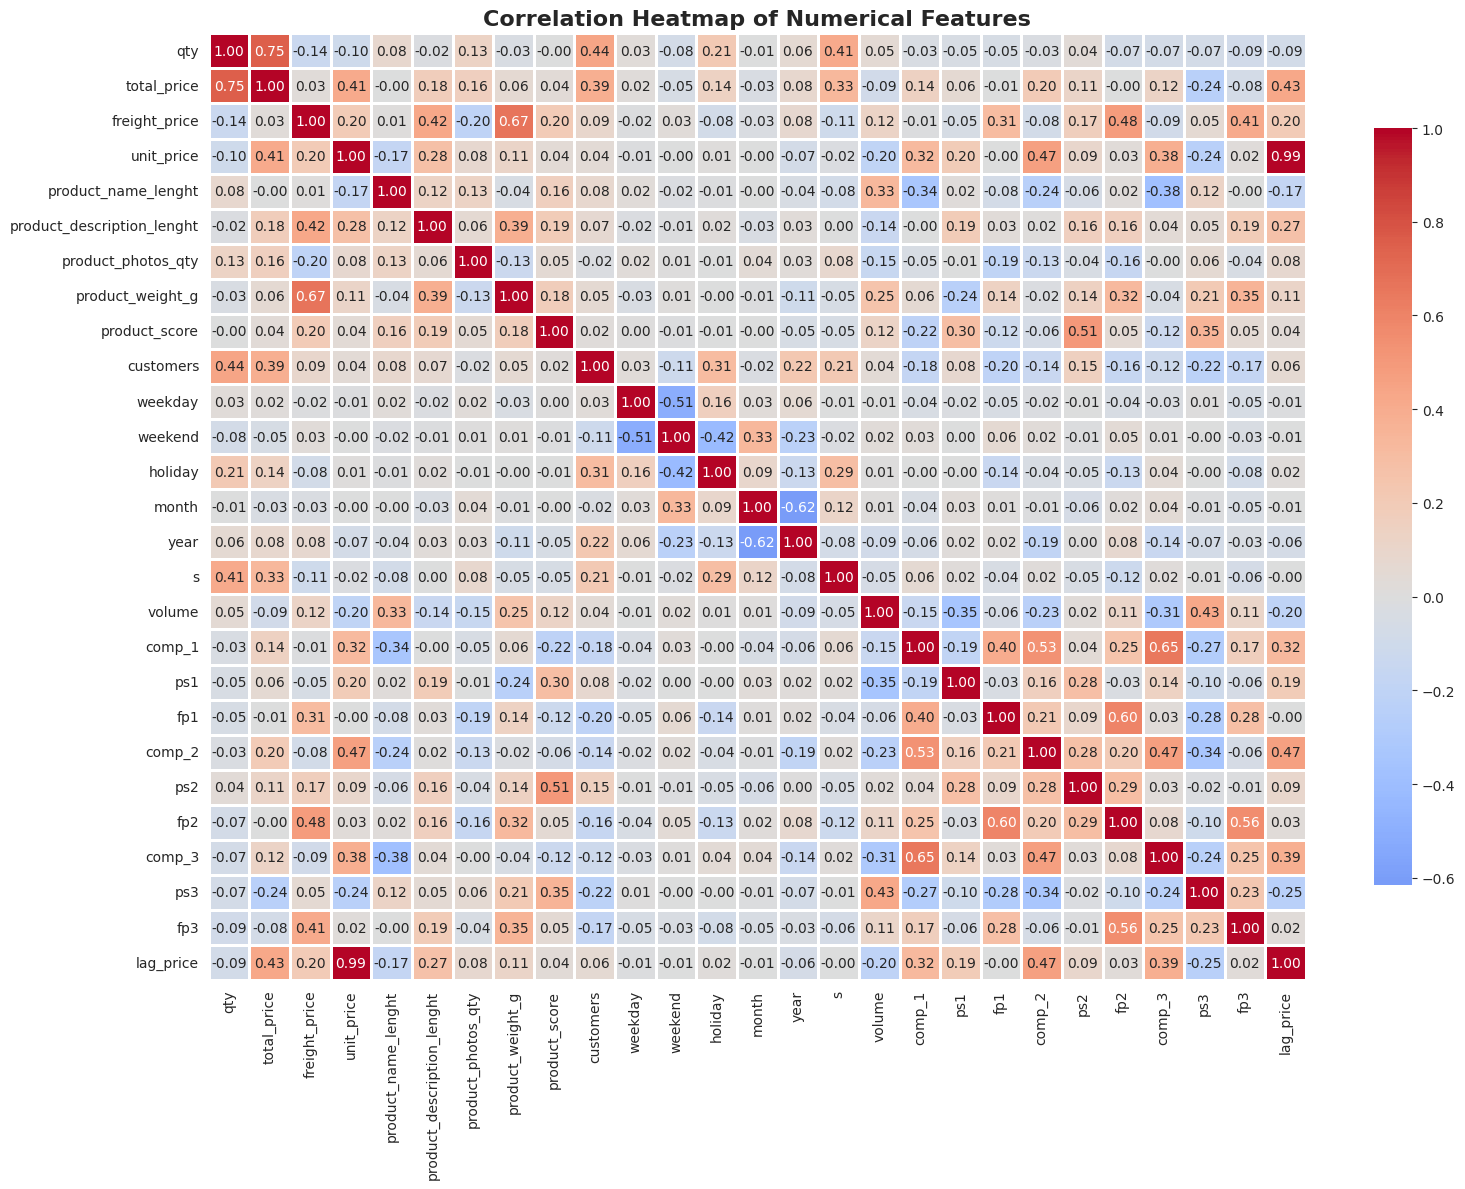

In [11]:
# 5. Correlation Heatmap
plt.figure(figsize=(16, 12))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


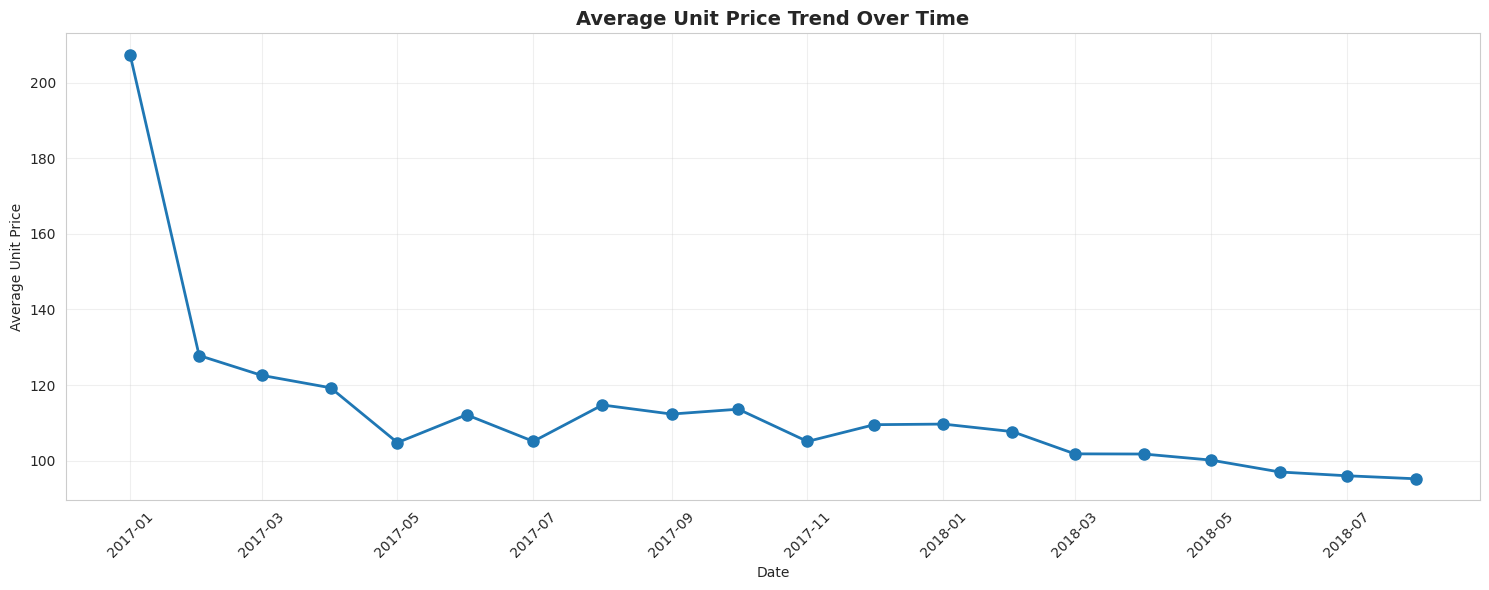

In [12]:
# 6. Price Trends Over Time
plt.figure(figsize=(15, 6))
df['month_year_dt'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')
price_trends = df.groupby('month_year_dt')['unit_price'].mean().reset_index()
plt.plot(price_trends['month_year_dt'], price_trends['unit_price'], marker='o', linewidth=2, markersize=8)
plt.title('Average Unit Price Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

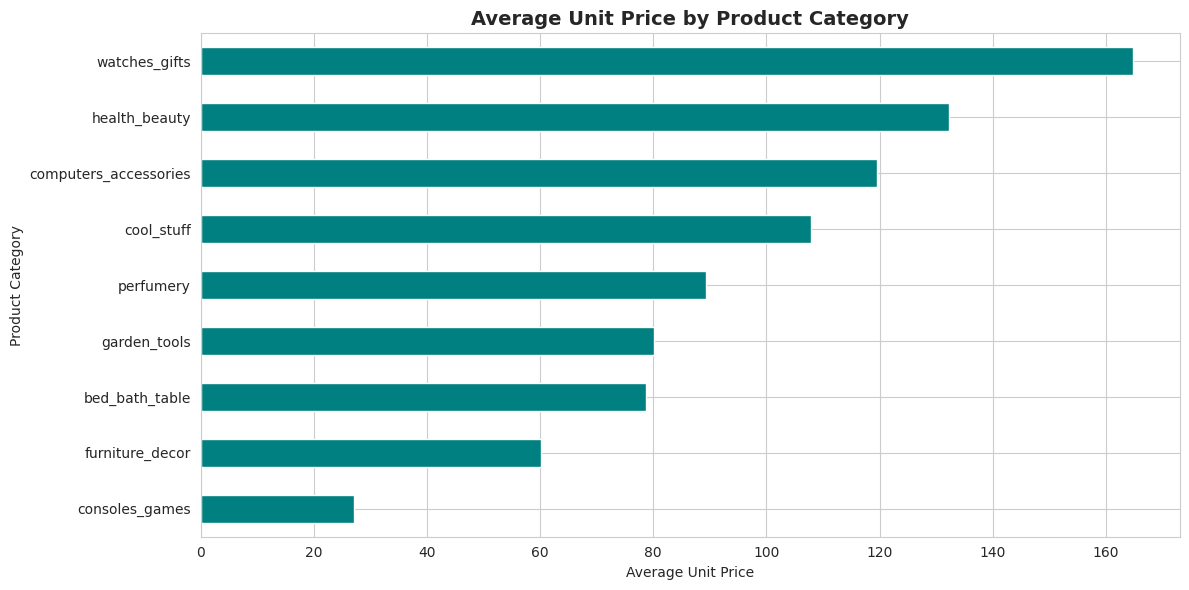

In [13]:
# 7. Product Category Analysis
plt.figure(figsize=(12, 6))
category_price = df.groupby('product_category_name')['unit_price'].mean().sort_values()
category_price.plot(kind='barh', color='teal')
plt.title('Average Unit Price by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Average Unit Price')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

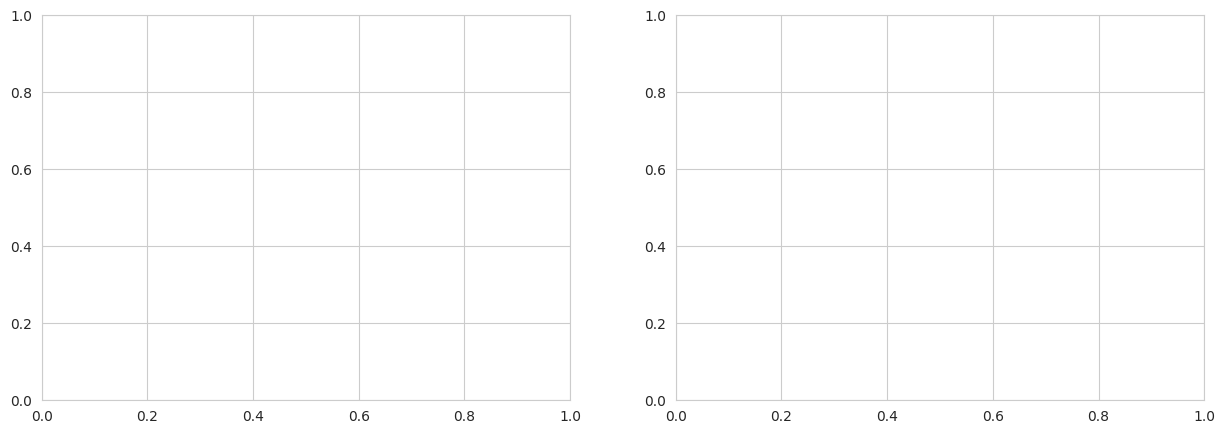

In [14]:
# 8. Demand Elasticity Analysis (Price vs Quantity)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

In [15]:
# Volume vs Price
axes[0].scatter(df['unit_price'], df['volume'], alpha=0.6, color='orange')
axes[0].set_title('Price vs Volume (Demand)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Volume')

Text(4.444444444444452, 0.5, 'Volume')

In [16]:
# Customers vs Price
axes[1].scatter(df['unit_price'], df['customers'], alpha=0.6, color='magenta')
axes[1].set_title('Price vs Number of Customers', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Unit Price')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

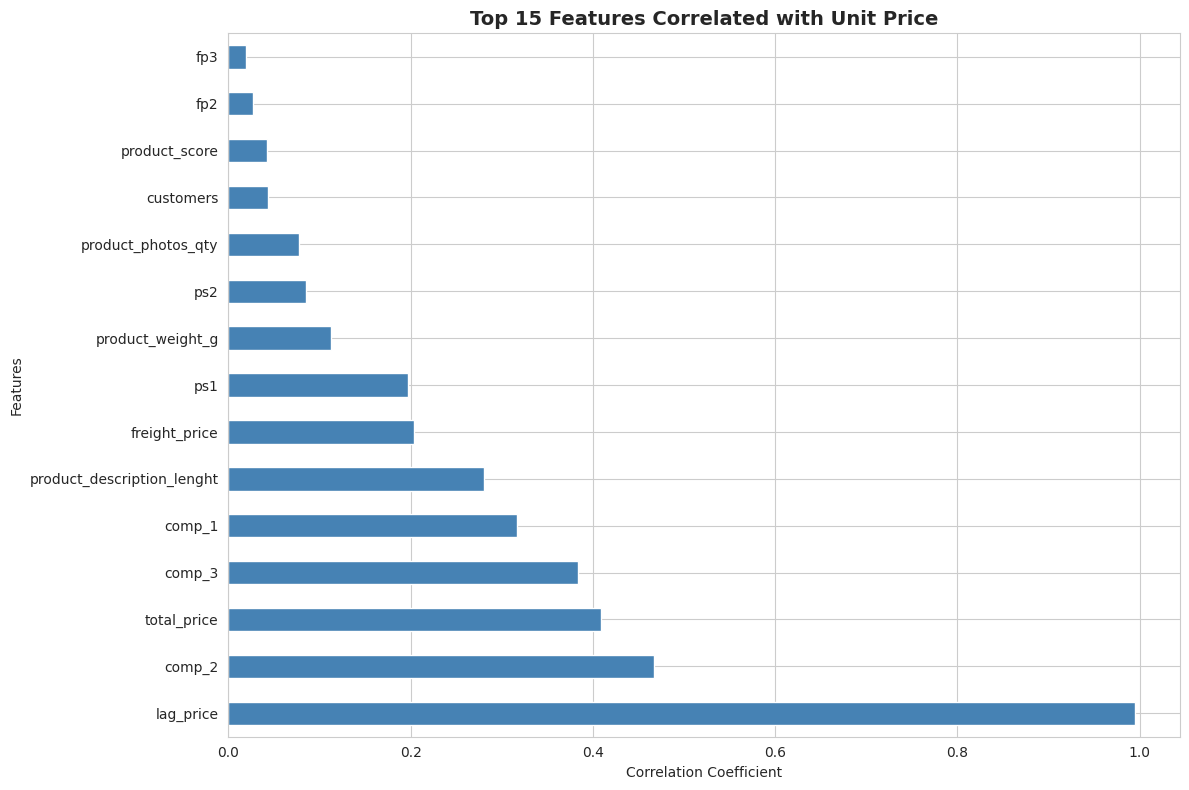


EXPLORATORY DATA ANALYSIS COMPLETED


In [17]:
# 9. Feature Importance Preview (using correlation with target)
plt.figure(figsize=(12, 8))
target_corr = correlation_matrix['unit_price'].sort_values(ascending=False)[1:16]
target_corr.plot(kind='barh', color='steelblue')
plt.title('Top 15 Features Correlated with Unit Price', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS COMPLETED")
print("="*60)

In [18]:
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)



DATA PREPROCESSING


In [19]:
# Create a copy for modeling
df_model = df.copy()

In [20]:
# Encode categorical variables
le = LabelEncoder()
df_model['product_id_encoded'] = le.fit_transform(df_model['product_id'])
df_model['product_category_encoded'] = le.fit_transform(df_model['product_category_name'])


In [21]:
# Feature Engineering
df_model['price_to_comp1_ratio'] = df_model['unit_price'] / (df_model['comp_1'] + 1)
df_model['price_to_comp2_ratio'] = df_model['unit_price'] / (df_model['comp_2'] + 1)
df_model['price_to_comp3_ratio'] = df_model['unit_price'] / (df_model['comp_3'] + 1)
df_model['avg_competitor_price'] = (df_model['comp_1'] + df_model['comp_2'] + df_model['comp_3']) / 3
df_model['price_vs_avg_comp'] = df_model['unit_price'] - df_model['avg_competitor_price']
df_model['total_freight'] = df_model['fp1'] + df_model['fp2'] + df_model['fp3']
df_model['avg_competitor_score'] = (df_model['ps1'] + df_model['ps2'] + df_model['ps3']) / 3
df_model['price_per_gram'] = df_model['unit_price'] / (df_model['product_weight_g'] + 1)
df_model['demand_indicator'] = df_model['qty'] * df_model['customers']

In [22]:
# Select features for modeling
feature_columns = [
    'qty', 'freight_price', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
    'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
    'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
    'lag_price', 'product_id_encoded', 'product_category_encoded',
    'price_to_comp1_ratio', 'price_to_comp2_ratio', 'price_to_comp3_ratio',
    'avg_competitor_price', 'price_vs_avg_comp', 'total_freight',
    'avg_competitor_score', 'price_per_gram', 'demand_indicator'
]

X = df_model[feature_columns]
y = df_model['unit_price']

print(f"\nFeature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")


Feature Matrix Shape: (676, 36)
Target Vector Shape: (676,)


In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")


Training Set Size: 540
Testing Set Size: 136


In [24]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")


Features scaled successfully!


In [29]:
print("\n" + "="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'predictions': y_test_pred
    }

    print(f"{name} Results:")
    print(f"  Train RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test MAE: {test_mae:.4f}")


MODEL TRAINING AND EVALUATION

Training Linear Regression...
Linear Regression Results:
  Train RMSE: 0.0000
  Test RMSE: 0.0000
  Train R²: 1.0000
  Test R²: 1.0000
  Test MAE: 0.0000

Training Ridge Regression...
Ridge Regression Results:
  Train RMSE: 1.0730
  Test RMSE: 1.2092
  Train R²: 0.9998
  Test R²: 0.9997
  Test MAE: 0.7068

Training Lasso Regression...
Lasso Regression Results:
  Train RMSE: 0.5387
  Test RMSE: 0.5477
  Train R²: 1.0000
  Test R²: 0.9999
  Test MAE: 0.3056

Training Random Forest...
Random Forest Results:
  Train RMSE: 2.7508
  Test RMSE: 6.0025
  Train R²: 0.9987
  Test R²: 0.9933
  Test MAE: 2.7922

Training Gradient Boosting...
Gradient Boosting Results:
  Train RMSE: 0.5049
  Test RMSE: 5.6997
  Train R²: 1.0000
  Test R²: 0.9940
  Test MAE: 2.6482


In [31]:
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()]
})

print("\n", comparison_df.to_string(index=False))


MODEL COMPARISON

             Model   Train RMSE    Test RMSE  Train R²  Test R²     Test MAE
Linear Regression 1.368088e-13 1.262184e-13  1.000000 1.000000 1.029242e-13
 Ridge Regression 1.072995e+00 1.209209e+00  0.999804 0.999729 7.068441e-01
 Lasso Regression 5.386978e-01 5.477113e-01  0.999951 0.999944 3.055662e-01
    Random Forest 2.750776e+00 6.002526e+00  0.998712 0.993331 2.792156e+00
Gradient Boosting 5.049299e-01 5.699669e+00  0.999957 0.993987 2.648204e+00


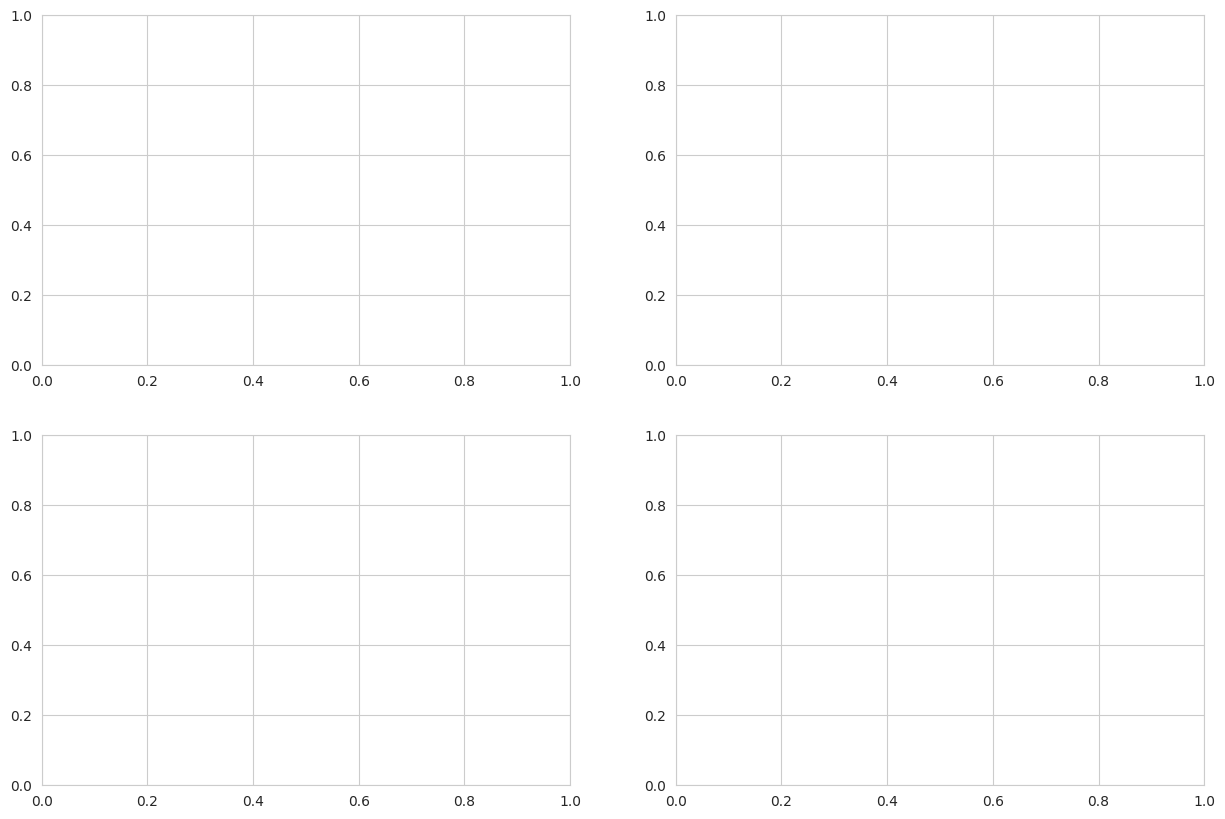

In [32]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [33]:
# RMSE Comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Test RMSE'], color='coral')
axes[0, 0].set_title('Test RMSE Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].tick_params(axis='x', rotation=45)

In [34]:
# R² Comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['Test R²'], color='skyblue')
axes[0, 1].set_title('Test R² Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].tick_params(axis='x', rotation=45)

In [35]:
# MAE Comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['Test MAE'], color='lightgreen')
axes[1, 0].set_title('Test MAE Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

In [36]:
# Train vs Test R²
x_pos = np.arange(len(comparison_df['Model']))
width = 0.35
axes[1, 1].bar(x_pos - width/2, comparison_df['Train R²'], width, label='Train R²', color='steelblue')
axes[1, 1].bar(x_pos + width/2, comparison_df['Test R²'], width, label='Test R²', color='orange')
axes[1, 1].set_title('Train vs Test R² Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(comparison_df['Model'], rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>


BEST MODEL: Linear Regression


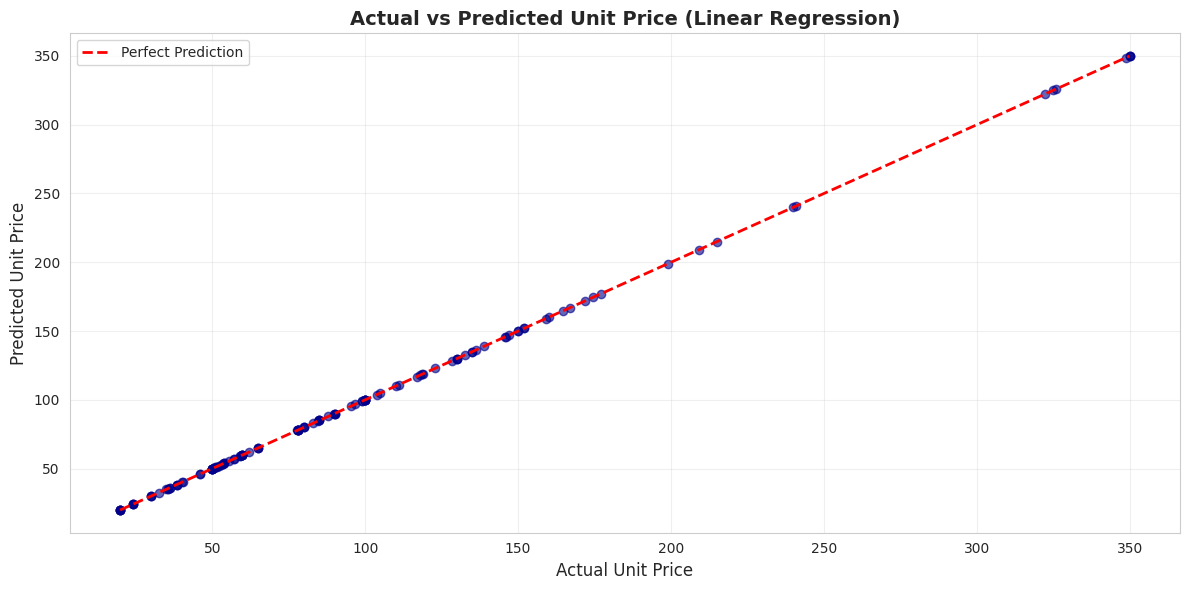

In [37]:
best_model_name = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*60}")

# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, best_predictions, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Unit Price', fontsize=12)
plt.ylabel('Predicted Unit Price', fontsize=12)
plt.title(f'Actual vs Predicted Unit Price ({best_model_name})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

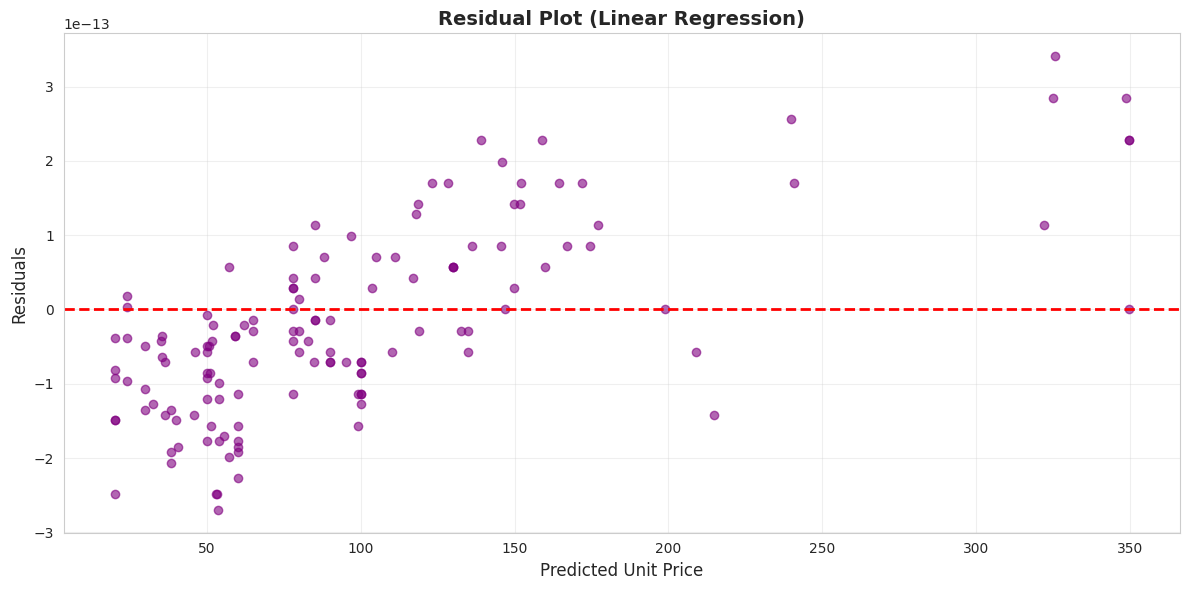

In [38]:
# Residual Plot
residuals = y_test - best_predictions
plt.figure(figsize=(12, 6))
plt.scatter(best_predictions, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Unit Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title(f'Residual Plot ({best_model_name})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Top 15 Feature Importances ({best_model_name})', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nTop 15 Most Important Features:")
    print(feature_importance.to_string(index=False))

In [40]:
import joblib

joblib.dump(best_model, 'price_optimization_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')

print("\n" + "="*60)
print("MODEL AND PREPROCESSING OBJECTS SAVED SUCCESSFULLY!")
print("="*60)
print("\nSaved files:")
print("- price_optimization_model.pkl")
print("- scaler.pkl")
print("- feature_columns.pkl")

# Save processed dataset
df_model.to_csv('processed_retail_price.csv', index=False)
print("- processed_retail_price.csv")

print("\n" + "="*60)
print("MODELING COMPLETE!")
print("="*60)


MODEL AND PREPROCESSING OBJECTS SAVED SUCCESSFULLY!

Saved files:
- price_optimization_model.pkl
- scaler.pkl
- feature_columns.pkl
- processed_retail_price.csv

MODELING COMPLETE!
